Data shape: (1797, 64)
Target shape: (1797,)


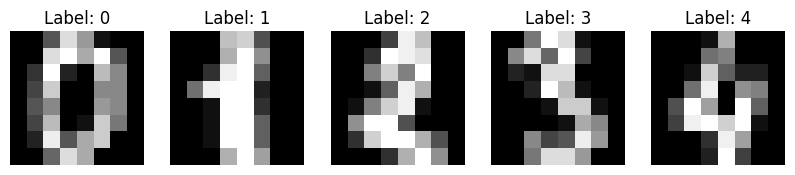

Number of samples: 1797
Number of features: 64
Class distribution: [178 182 177 183 181 182 181 179 174 180]


C:\Users\User\AppData\Local\Temp\ipykernel_8280\3673685115.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


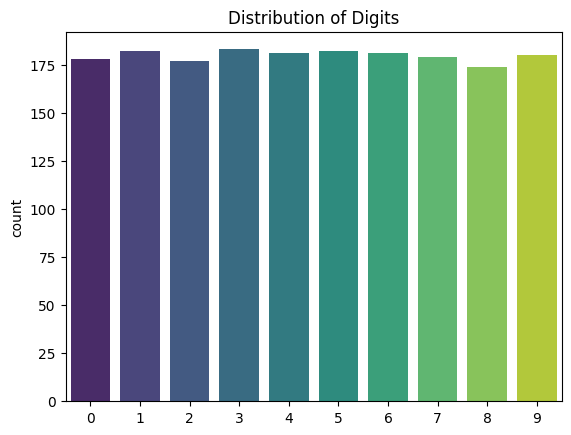


=== Linear Kernel Results ===
Accuracy: 0.975
Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  1  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  0  0  0  1  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       0.95      0.97     

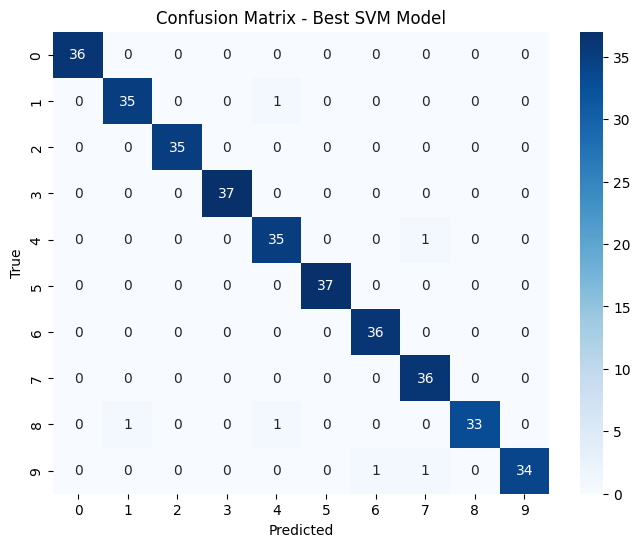

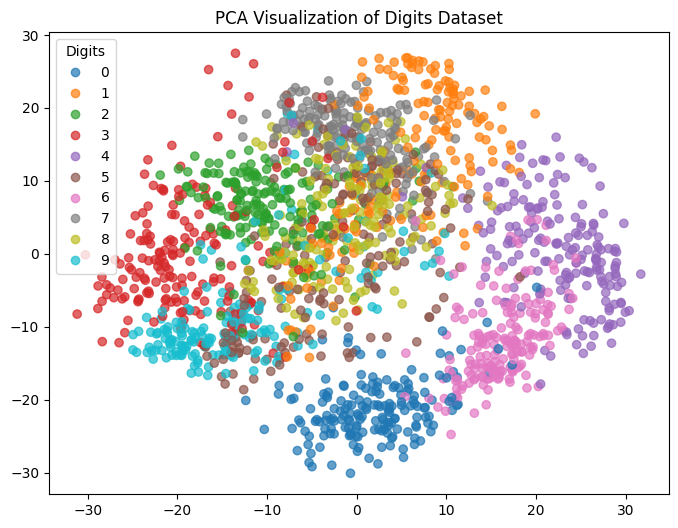

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


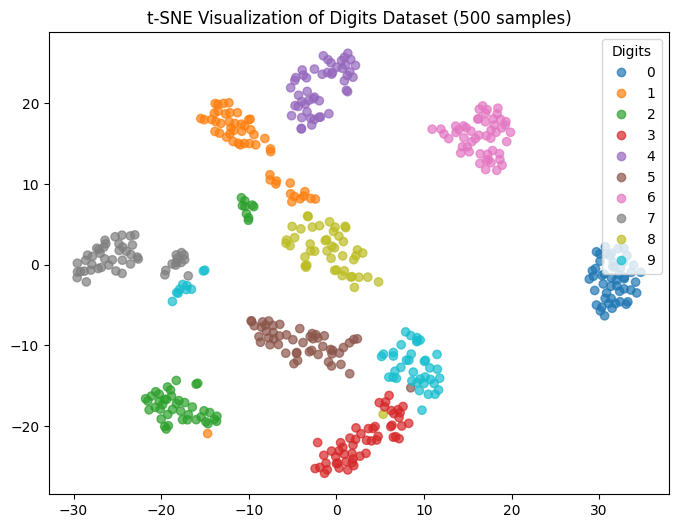

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


digits = load_digits()
X, y = digits.data, digits.target

print("Data shape:", X.shape)
print("Target shape:", y.shape)

# Show sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.show()


print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Class distribution:", np.bincount(y))

sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Digits")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("\n=== Linear Kernel Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))


poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

print("\n=== Polynomial Kernel Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))

rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("\n=== RBF Kernel Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))


param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ['scale', 0.001, 0.01, 0.1],
    "kernel": ['rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

print("\n=== Best Parameters from GridSearch ===")
print(grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA Visualization of Digits Dataset")
plt.show()

# t-SNE visualization (slow on large data, so use 500 samples)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X[:500])
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:500], cmap="tab10", alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("t-SNE Visualization of Digits Dataset (500 samples)")
plt.show()
